In [8]:
import pandas as pd
df = pd.read_csv("Datasets/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
# a mapping dictionary that maps the quality values from 0 to 5

quality_mapping = {
3: 0,
4: 1,
5: 2,
6: 3,
7: 4,
8: 5
}

# column to values in the dictionary
df.loc[:, "quality"] = df.quality.map(quality_mapping)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [11]:
# use sample with frac=1 to shuffle the dataframe
# we reset the indices since they change after
# shuffling the dataframe

df = df.sample(frac=1).reset_index(drop=True)
# top 1000 rows are selected
# for training

df_train = df.head(1000)
# bottom 599 values are selected
# for testing/validation

df_test = df.tail(599)

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,2.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,2.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,3.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,3.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,5.000000


In [22]:
# import from scikit-learn
from sklearn import tree
from sklearn import metrics

# initialize decision tree classifier class
# with a max_depth of 3
clf = tree.DecisionTreeClassifier(max_depth=7)

# choose the columns you want to train on
# these are the features for the model
cols = ['fixed acidity',
'volatile acidity',
'citric acid',
'residual sugar',
'chlorides',
'free sulfur dioxide',
'total sulfur dioxide',
'density',
'pH',
'sulphates',
'alcohol']

# train the model on the provided features
# and mapped quality from before
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])
# generate predictions on the test set
test_predictions = clf.predict(df_test[cols])
# calculate the accuracy of predictions on
# training data set
train_accuracy = metrics.accuracy_score(
df_train.quality, train_predictions
)
# calculate the accuracy of predictions on
# test data set
test_accuracy = metrics.accuracy_score(
df_test.quality, test_predictions
)

print(train_accuracy*100,test_accuracy*100)

79.0 57.26210350584308


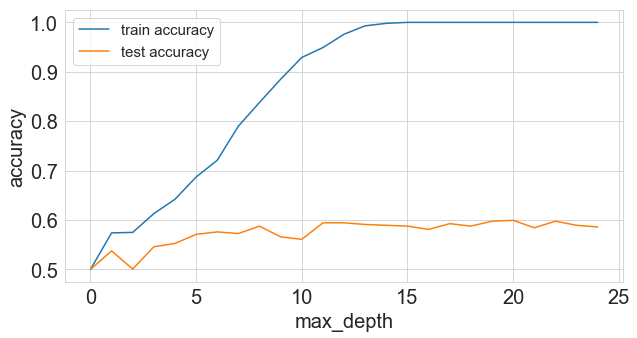

In [26]:
# import matplotlib and seaborn
# for plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# this is our global size of label text
# on the plots

matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
%matplotlib inline

# initialize lists to store accuracies
# for training and test data
# we start with 50% accuracy
train_accuracies = [0.5]
test_accuracies = [0.5]

# iterate over a few depth values
for depth in range(1, 25):
    # init the model
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    # columns/features for training
    # note that, this can be done outside
    # the loop
    cols = [
        'fixed acidity',
        'volatile acidity',
        'citric acid',
        'residual sugar',
        'chlorides',
        'free sulfur dioxide',
        'total sulfur dioxide',
        'density',
        'pH',
        'sulphates','alcohol'
    ]
    # fit the model on given features
    clf.fit(df_train[cols], df_train.quality)
    # create training & test predictions
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    # calculate training & test accuracies
    train_accuracy = metrics.accuracy_score(
    df_train.quality, train_predictions
    )
    test_accuracy = metrics.accuracy_score(
    df_test.quality, test_predictions
    )
    # append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
# create two plots using matplotlib
# and seaborn
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()